<a href="https://colab.research.google.com/github/istiak9999/XGBoost-Hyperameter-tuning-on-House-Price-dataset/blob/main/XGBoost_Parameter_tuning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew



In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.4 MB/s 


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Machine Learning Dataset/hous prices advanced regression technique data/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Machine Learning Dataset/hous prices advanced regression technique data/test.csv")

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

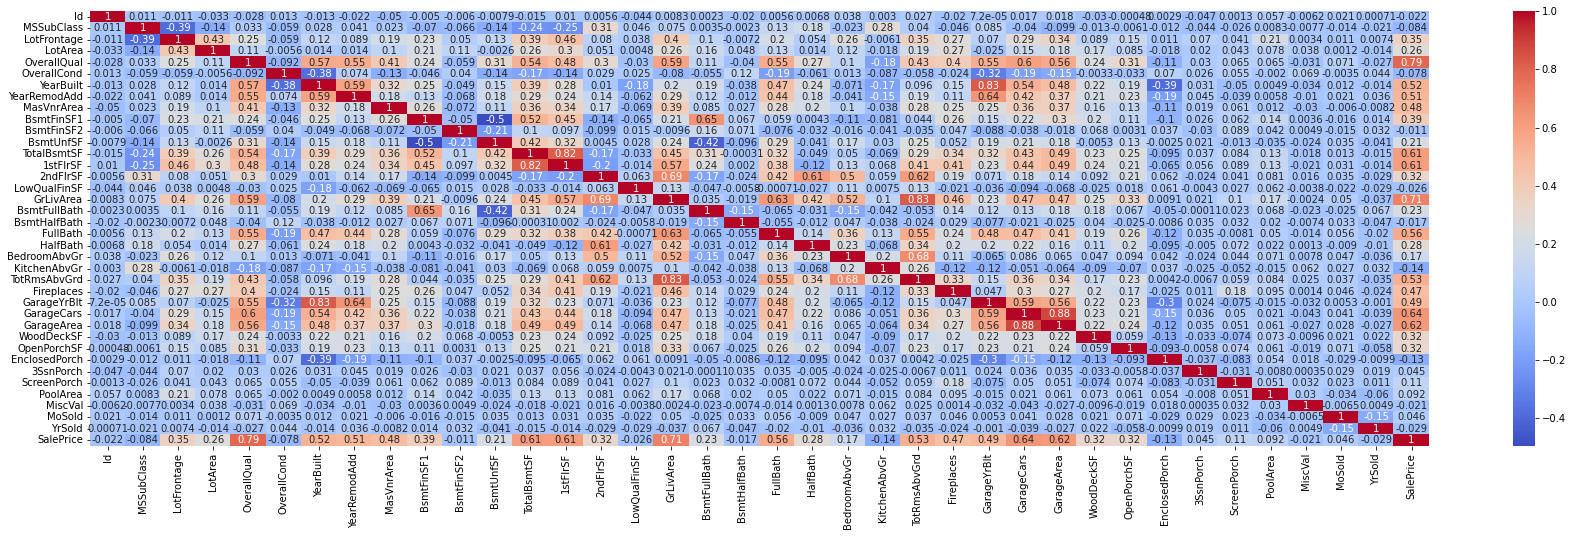

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
corr = train.corr()

In [ ]:
corr[corr['SalePrice']>0.2].index

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

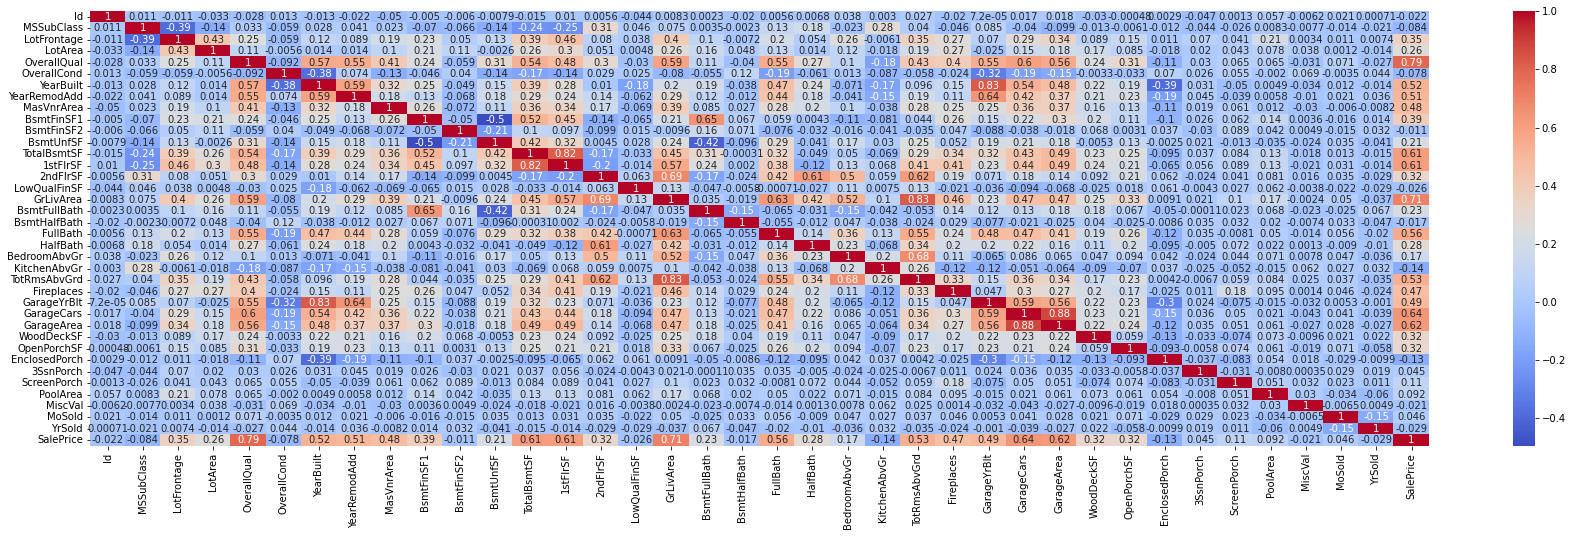

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
train=train[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test_id=test['Id']
test=test[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF']]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   OverallQual   1460 non-null   int64  
 3   YearBuilt     1460 non-null   int64  
 4   YearRemodAdd  1460 non-null   int64  
 5   MasVnrArea    1452 non-null   float64
 6   BsmtFinSF1    1460 non-null   int64  
 7   BsmtUnfSF     1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   int64  
 9   1stFlrSF      1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  FullBath      1460 non-null   int64  
 14  HalfBath      1460 non-null   int64  
 15  TotRmsAbvGrd  1460 non-null   int64  
 16  Fireplaces    1460 non-null   int64  
 17  GarageYrBlt   1379 non-null   float64
 18  GarageCars    1460 non-null 

In [ ]:
#missing data

#ontrain dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [ ]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())


In [ ]:
train.isnull().sum().sort_values(ascending=False).head(25)

LotFrontage     0
BsmtFullBath    0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
LotArea         0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
SalePrice       0
dtype: int64

In [ ]:
#missing data

#ontest dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtFullBath,2,0.001371
GarageArea,1,0.000685
GarageCars,1,0.000685
BsmtFinSF1,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
HalfBath,0,0.000000


In [ ]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     0
LotArea         0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
BsmtFullBath    0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
dtype: int64

In [ ]:
numerical_cols = [cname for cname in test.columns if test[cname].dtype in ['int64', 'float64']]
# Get list of categorical variables
object_cols = [cname for cname in test.columns if test[cname].dtype in ['object']]
print("Numerical columns:")
print(numerical_cols)
print("\n Object columns:")
print(object_cols)

Numerical columns:
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

 Object columns:
[]


In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

dtrain= train
target = 'SalePrice'


In [ ]:
predictors = [x for x in train.columns if x not in [target]]
predictors

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [ ]:
def modelfitting(alg,dtrain,predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
     #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')

    
        #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
xgb1 = XGBRegressor (
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfitting(xgb1,dtrain,predictors,target)

In [ ]:
#Importing packages
from sklearn.model_selection import train_test_split

X = train.drop(columns="SalePrice")
y = train["SalePrice"]

#Particiona o data set originalmente Train em Train(Treino) e Val(validação)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((1095, 22), (365, 22))

In [ ]:
#Importing Packages
import matplotlib.pyplot as plt

from xgboost import XGBRegressor,plot_importance
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train,params):
    param_tuning = params
    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                  
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)
    print(gsearch.best_params_, gsearch.best_score_)



    return 

In [ ]:
#Run only in the first run of the kernel.
params={
    'learning_rate': [0.1],
     'n_estimators': [200,400,600,800,1000],
     'max_depth':[5],
     'min_child_weight': [1],
     'gamma':[0],
     'subsample':[0.8],
     'colsample_bytree':[0.8],
     'objective': ['reg:squarederror'],
     'nthread':[4],
     'scale_pos_weight' :[1],
     'seed':[27]
 }

hyperParameterTuning(X_train, y_train,params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'scale_pos_weight': 1, 'seed': 27, 'subsample': 0.8} -18085.6671875


In [ ]:
param_test2 = {
 'n_estimators': range (55,65,5)
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_ 

({'n_estimators': 60}, -17886.555925371)

In [ ]:
param_test3 = {
  'max_depth':range(3,10,1),
 'min_child_weight': range(3,10,1)
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'max_depth': 6, 'min_child_weight': 9}, -17644.98190639269)

In [ ]:
param_test4 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_ 

({'gamma': 0.0}, -17644.98190639269)

In [ ]:
param_test5 = {
 'subsample':[i/10.0 for i in range(4,10)],
 'colsample_bytree':[i/10.0 for i in range(4,10)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.5, 'subsample': 0.5}, -17318.299450627852)

In [ ]:
param_test6 = {
 'subsample':[i/100.0 for i in range(45,60,5)],
 'colsample_bytree':[i/100.0 for i in range(45,60,5)]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.5, colsample_bytree=0.5,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

({'colsample_bytree': 0.55, 'subsample': 0.5}, -17312.862653396118)

In [ ]:
param_test7 = {
 'reg_alpha':[i/10.0 for i in range(1,20,2)]
}
gsearch7 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.5, colsample_bytree=0.55,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch7.fit(X_train,y_train)
gsearch7.best_params_, gsearch7.best_score_ 

({'reg_alpha': 0.5}, -17312.861023116442)

In [ ]:
param_test8 = {
  'seed':range(35,45,1)
}
gsearch8 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.5, colsample_bytree=0.55,
 objective= 'reg:squarederror', reg_alpha=0.5,nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test8, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch8.fit(X_train,y_train)
gsearch8.best_params_, gsearch8.best_score_ 

({'seed': 41}, -17152.927507848173)

In [ ]:
param_test9 = {
  'learning_rate':[0.01,0.001],
  'n_estimators':[1000,2000,500]
}
gsearch9 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.5, colsample_bytree=0.55,
 objective= 'reg:squarederror', reg_alpha=0.5,nthread=1, scale_pos_weight=1,seed=41), 
 param_grid = param_test9, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch9.fit(X_train,y_train)
gsearch9.best_params_, gsearch9.best_score_ 

({'learning_rate': 0.01, 'n_estimators': 500}, -16631.991345605024)

In [ ]:
xgb3 =  XGBRegressor( learning_rate=0.1, n_estimators=60, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.5, colsample_bytree=0.55,
 objective= 'reg:squarederror', reg_alpha=0.5,nthread=1, scale_pos_weight=1,seed=41)

In [ ]:
xgb3.fit(X_train,y_train)

XGBRegressor(colsample_bytree=0.55, max_depth=6, min_child_weight=9,
             n_estimators=60, nthread=1, objective='reg:squarederror',
             reg_alpha=0.5, seed=41, subsample=0.5)

In [ ]:
predictions= xgb3.predict(X_test)

In [ ]:
import numpy as np
from sklearn import metrics


Model Report
Accuracy : 0.1027


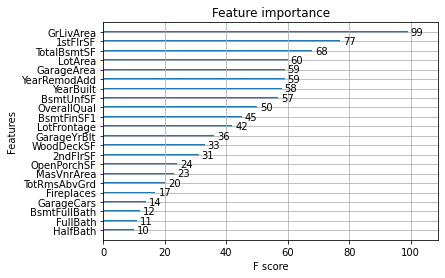

In [ ]:
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.mean_absolute_percentage_error(y_test,predictions))
                    
    # get importance
    plot_importance(xgb3)

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))

MAE: 18396.39167380137
MSE: 1056592883.8798242


In [ ]:
predictions_test =xgb3.predict(test)

In [ ]:
submission = pd.DataFrame({'Id':test_id,'SalePrice':predictions_test})
submission.to_csv("submission.csv",index=False)

In [ ]:
submission

,Id,SalePrice
0,1461,127213.187500
1,1462,159934.187500
2,1463,183573.046875
3,1464,189500.859375
4,1465,190270.687500
...,...,...
1454,2915,76820.570312
1455,2916,85982.367188
1456,2917,170043.453125
1457,2918,120023.695312


In [ ]:
!pip install flaml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 205 kB 9.3 MB/s 
     |████████████████████████████████| 2.0 MB 48.0 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="regression",metric='mae',time_budget=300)

[flaml.automl: 08-26 13:38:09] {2565} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 08-26 13:38:09] {2567} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 08-26 13:38:09] {2570} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 08-26 13:38:09] {2689} INFO - Minimizing error metric: mae
INFO:flaml.automl:Minimizing error metric: mae
[flaml.automl: 08-26 13:38:09] {2831} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 08-26 13:38:09] {3133} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 08-26 13:38:09] {3267} INFO - Estimated sufficient time budget=946s. Estimated necessary time budget=7s.
INFO:flaml.automl:Estimated sufficient time budget=946s.

In [ ]:
test=pd.read_csv("/content/test.csv")

In [ ]:
test.shap
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_id=test['Id']

In [ ]:
test=test[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF']]

In [ ]:
test.shape

(1459, 22)

In [ ]:
predictions =automl.predict(test)

In [ ]:
submission = pd.DataFrame({'Id':test_id,'SalePrice':predictions})

In [ ]:
submission.to_csv("submission.csv",index=False)

In [ ]:
submission

,Id,SalePrice
0,1461,123581.736106
1,1462,151985.877494
2,1463,179697.501447
3,1464,184320.868104
4,1465,186196.817562
...,...,...
1454,2915,87529.850797
1455,2916,86091.906540
1456,2917,168813.534504
1457,2918,97839.246682
